In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [10]:
housing = fetch_california_housing(data_home='/content/drive/MyDrive/data/california-housing.csv')

print(f"The shape of data: {housing.data.shape}\n")
print(f"The shape of target: {housing.target.shape}\n")
print(f"The shape of feature_names: {housing.feature_names}")

df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target
df.describe()

The shape of data: (20640, 8)

The shape of target: (20640,)

The shape of feature_names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
print(housing['DESCR'] + '\n')

📦 Loading California Housing Dataset...

🎨 Data Visualization:


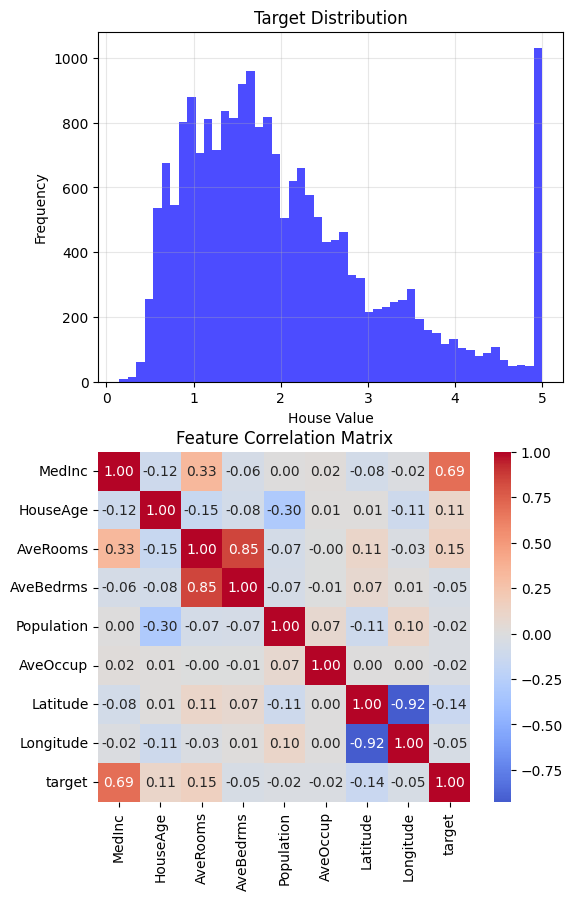

In [6]:
class DataExplorer:
    """
    Comprehensive data exploration and preprocessing
    """

    def __init__(self):
        self.data = None
        self.target = None
        self.feature_names = None
        self.scaler = StandardScaler()

    def load_and_explore_data(self):
        """Load and explore the California Housing dataset"""
        print("📦 Loading California Housing Dataset...")

        # Load data
        housing = fetch_california_housing(data_home='/content/drive/MyDrive/data/california-housing.csv')
        self.data = housing.data
        self.target = housing.target
        self.feature_names = housing.feature_names

        # Create DataFrame for easier analysis
        df = pd.DataFrame(self.data, columns=self.feature_names)
        df['target'] = self.target

        return df

    def visualize_data(self, df):
        """Comprehensive data visualization"""
        print("\n🎨 Data Visualization:")

        # Create comprehensive visualization
        # fig, axes = plt.subplots(nrows, ncols, figsize)
        fig, axes = plt.subplots(2, 1, figsize=(6, 10))

        # 1. Target distribution
        axes[0].hist(df['target'], bins=50, alpha=0.7, color='blue')
        axes[0].set_xlabel('House Value')
        axes[0].set_ylabel('Frequency')
        axes[0].set_title('Target Distribution')
        axes[0].grid(True, alpha=0.3)

        # 2. Correlation heatmap
        correlation_matrix = df.corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                   ax=axes[1], fmt='.2f')
        axes[1].set_title('Feature Correlation Matrix')

    def preprocess_data(self):
        """Data preprocessing for neural network"""
        # Apply standardization
        X_scaled = self.scaler.fit_transform(self.data)

        return X_scaled

# Execute data exploration
explorer = DataExplorer()
df = explorer.load_and_explore_data()
explorer.visualize_data(df)
X_scaled = explorer.preprocess_data()


Model Training and Evaluation
--------------------------------------------------

📊 Data Split:
   X_train.shape: (16512, 8)
   X_test.shape: (4128, 8)
   y_train.shape: (16512,)
   y_test.shape: (4128,)

🎯 Neural Network Initialized:
   Input dimension: 8
   Initial weights shape: (8,)
   Initial bias: -0.0047
   Learning rate: 0.01

🚀 Starting Training:
   Training samples: 16512
   Epochs: 1000
   Learning rate: 0.01
   Epoch  100: Loss: 0.811646, Val Loss: 0.817883
   Epoch  200: Loss: 0.669681, Val Loss: 0.682338
   Epoch  300: Loss: 0.632637, Val Loss: 0.648827
   Epoch  400: Loss: 0.605990, Val Loss: 0.625607
   Epoch  500: Loss: 0.585814, Val Loss: 0.608646
   Epoch  600: Loss: 0.570465, Val Loss: 0.596217
   Epoch  700: Loss: 0.558748, Val Loss: 0.587091
   Epoch  800: Loss: 0.549772, Val Loss: 0.580370
   Epoch  900: Loss: 0.542871, Val Loss: 0.575400
   Epoch 1000: Loss: 0.537544, Val Loss: 0.571703

✅ Training completed!
   Final loss: 0.537544
   Final weights: ['0.92', '

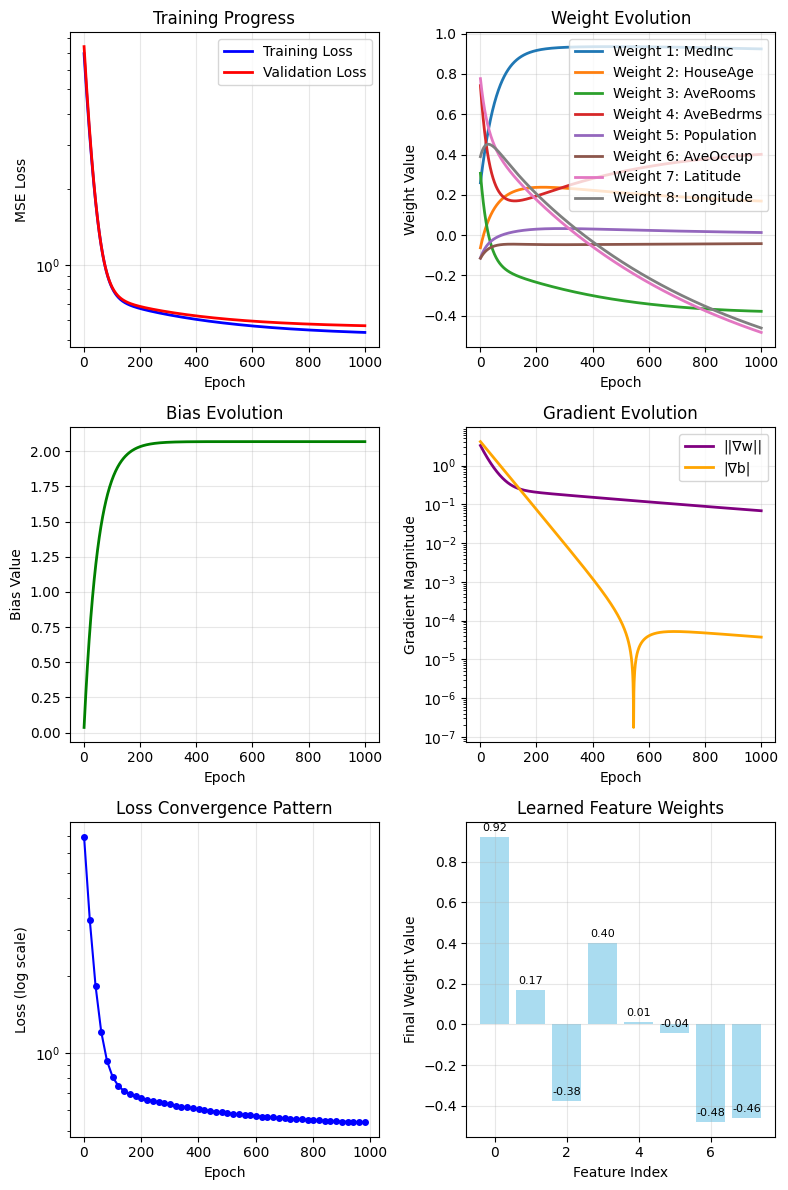

In [8]:
class LinearNeuralNetwork:
    """
    Complete implementation of linear neural network with detailed mathematical explanations
    """

    def __init__(self, input_dim, learning_rate=0.01, random_seed=42):
        """
        Initialize the linear neural network

        Args:
            input_dim: Number of input features
            learning_rate: Step size for gradient descent
            random_seed: For reproducible results
        """
        np.random.seed(random_seed)

        self.input_dim = input_dim
        self.weights = np.random.randn(input_dim) * np.sqrt(2.0 / input_dim)
        self.bias = np.random.randn() * 0.01
        self.learning_rate = learning_rate

        # Training history
        self.history = {
            'loss': [],
            'weights': [],
            'bias': [],
            'gradients_w': [],
            'gradients_b': [],
            'val_loss': []
        }

        print(f"\n🎯 Neural Network Initialized:")
        print(f"   Input dimension: {input_dim}")
        print(f"   Initial weights shape: {self.weights.shape}")
        print(f"   Initial bias: {self.bias:.4f}")
        print(f"   Learning rate: {learning_rate}")

    def forward_pass(self, X):
        return X @ self.weights + self.bias

    def compute_loss(self, y_true, y_pred):
        """
        Compute Mean Squared Error (MSE) loss

        Mathematical Formula:
        L = (1/n) × Σ(y_true - y_pred)²
        """
        return np.sum((y_true - y_pred) ** 2) / len(y_true)

    def compute_gradients(self, X, y_true, y_pred):
        n = len(y_true)
        error = y_true - y_pred

        """
        Gradient with respect to weights
        - X.shape: (m, n)
        - X.T: (n, m)
        - error: (m, )
        => X.T @ error: (n, )
        """
        grad_w = -2 * X.T @ error / n

        # Gradient with respect to bias
        grad_b = -2 * np.sum(error) / n

        return grad_w, grad_b

    def update_gradient(self, grad_w, grad_b):
        self.weights = self.weights - self.learning_rate * grad_w
        self.bias    = self.bias    - self.learning_rate * grad_b

    def predict(self, X):
        """Make predictions on new data"""
        return X @ self.weights + self.bias

    def train(self, X, y, epochs=1000, verbose=True, validation_data=None):
        print(f"\n🚀 Starting Training:")
        print(f"   Training samples: {len(X)}")
        print(f"   Epochs: {epochs}")
        print(f"   Learning rate: {self.learning_rate}")

        for epoch in range(epochs):
            # Forward pass
            y_pred = self.forward_pass(X)

            # Compute loss
            loss = self.compute_loss(y, y_pred)

            # Compute gradients (backpropagation)
            grad_w, grad_b = self.compute_gradients(X, y, y_pred)

            # Update parameters (gradient descent)
            self.update_gradient(grad_w, grad_b)

            # Store history
            self.history['loss'].append(loss)
            self.history['weights'].append(self.weights.copy())
            self.history['bias'].append(self.bias)
            self.history['gradients_w'].append(grad_w.copy())
            self.history['gradients_b'].append(grad_b)

            # Validation loss
            if validation_data is not None:
              X_val, y_val = validation_data
              y_val_pred = self.predict(X_val)
              val_loss = self.compute_loss(y_val, y_val_pred)
              self.history['val_loss'].append(val_loss)

            # Print progress
            if verbose and (epoch + 1) % (epochs // 10) == 0:
                val_info = f", Val Loss: {val_loss:.6f}"
                print(f"   Epoch {epoch+1:4d}: Loss: {loss:.6f}{val_info}")

        print(f"\n✅ Training completed!")
        print(f"   Final loss: {self.history['loss'][-1]:.6f}")
        print(f"   Final weights: {[f'{w:.2f}' for w in self.weights]}")
        print(f"   Final bias: {self.bias:.6f}")

    def visualize_training(self):
        """Visualize the training process"""
        epochs = range(1, len(self.history['loss']) + 1)
        fig, axes = plt.subplots(3, 2, figsize=(8, 12))

        # 1. Loss curve
        axes[0, 0].plot(epochs, self.history['loss'], 'b-', linewidth=2, label='Training Loss')
        axes[0, 0].plot(epochs, self.history['val_loss'], 'r-', linewidth=2, label='Validation Loss')
        axes[0, 0].set_xlabel('Epoch')
        axes[0, 0].set_ylabel('MSE Loss')
        axes[0, 0].set_title('Training Progress')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)
        axes[0, 0].set_yscale('log')

        # 2. Weight evolution (first few weights)
        weights_history = np.array(self.history['weights'])
        for i in range(weights_history.shape[1]):
            axes[0, 1].plot(epochs, weights_history[:, i], linewidth=2, label=f'Weight {i+1}: {explorer.feature_names[i]}')
        axes[0, 1].set_xlabel('Epoch')
        axes[0, 1].set_ylabel('Weight Value')
        axes[0, 1].set_title('Weight Evolution')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)

        # 3. Bias evolution
        axes[1, 0].plot(epochs, self.history['bias'], 'g-', linewidth=2)
        axes[1, 0].set_xlabel('Epoch')
        axes[1, 0].set_ylabel('Bias Value')
        axes[1, 0].set_title('Bias Evolution')
        axes[1, 0].grid(True, alpha=0.3)

        # 4. Gradient magnitudes
        grad_w_norms = [np.linalg.norm(grad) for grad in self.history['gradients_w']] # L2
        grad_b_abs = [abs(grad) for grad in self.history['gradients_b']]

        axes[1, 1].plot(epochs, grad_w_norms, 'purple', linewidth=2, label='||∇w||')
        axes[1, 1].plot(epochs, grad_b_abs, 'orange', linewidth=2, label='|∇b|')
        axes[1, 1].set_xlabel('Epoch')
        axes[1, 1].set_ylabel('Gradient Magnitude')
        axes[1, 1].set_title('Gradient Evolution')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)
        axes[1, 1].set_yscale('log')

        # 5. Learning rate effect visualization
        # [::step]
        sample_losses = self.history['loss'][::max(1, len(self.history['loss'])//50)]
        sample_epochs = epochs[::max(1, len(epochs)//50)]

        axes[2, 0].semilogy(sample_epochs, sample_losses, 'bo-', markersize=4)
        axes[2, 0].set_xlabel('Epoch')
        axes[2, 0].set_ylabel('Loss (log scale)')
        axes[2, 0].set_title('Loss Convergence Pattern')
        axes[2, 0].grid(True, alpha=0.3)

        # 6. Final weight distribution
        axes[2, 1].bar(range(len(self.weights)), self.weights, alpha=0.7, color='skyblue')
        for i, value in enumerate(self.weights):
          axes[2, 1].text(i, value + 0.02, f'{value:.2f}', ha='center', va='bottom', fontsize=8)
        axes[2, 1].set_xlabel('Feature Index')
        axes[2, 1].set_ylabel('Final Weight Value')
        axes[2, 1].set_title('Learned Feature Weights')
        axes[2, 1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

print("\n" + "="*80)
print("Model Training and Evaluation")
print("-"*50)

# Prepare data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, explorer.target, test_size=0.2, random_state=42
)

print(f"\n📊 Data Split:")
print(f"   X_train.shape: {X_train.shape}")
print(f"   X_test.shape: {X_test.shape}")
print(f"   y_train.shape: {y_train.shape}")
print(f"   y_test.shape: {y_test.shape}")

# Initialize and train model
model = LinearNeuralNetwork(
    input_dim=X_train.shape[1],
    learning_rate=0.01,
    random_seed=42
)

# Train with validation data
model.train(
    X_train, y_train,
    epochs=1000,
    verbose=True,
    validation_data=(X_test, y_test)
)

# Visualize training process
model.visualize_training()